# Model Evaluation on Breizhcrops dataset

### Dataset split:

- Train: regions FRH01, FRH02, FRH03, 
- Test: region FRH04

Use only L1C for now


In [1]:
import os
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import sys
sys.path.append("..")
from aitlas.datasets import BreizhCropsDataset
from aitlas.utils import get_class

In [2]:

test_dataset_config = {
                    "regions":["frh04"],
                    "root":"../data/breizhcrops_dataset",
                    "year":2017,
                    "level":"L1C",
                    "batch_size": 1024,
                    "shuffle": False,
                    "num_workers": 4,
                    "transforms": ["aitlas.transforms.SelectBands"]
                }
train_dataset_config = {
                    "regions":["frh01", "frh02", "frh03"],
                    "root":"../data/breizhcrops_dataset",
                    "year":2017,
                    "level":"L1C",
                    "batch_size": 1024,
                    "shuffle": False,
                    "num_workers": 4,
                    "transforms": ["aitlas.transforms.SelectBands"]
                }


## Explore train dataset 

In [3]:
train_dataset = BreizhCropsDataset(train_dataset_config)

train_dataset.show_samples()

Path ../data/breizhcrops_dataset/2017/L1C/frh01.h5
Path ../data/breizhcrops_dataset/2017/L1C/frh02.h5
Path ../data/breizhcrops_dataset/2017/L1C/frh03.h5


,Unnamed: 0,id,CODE_CULTU,path,idx,meanCLD,sequencelength,classid,classname,region
0,2,6017310,CZH,csv/frh01/6017310.csv,2,710.327555,50,2,rapeseed,frh01
1,3,6017311,BTH,csv/frh01/6017311.csv,3,717.753189,50,1,wheat,frh01
2,8,6021325,BTH,csv/frh01/6021325.csv,8,716.923683,50,1,wheat,frh01
3,12,6021396,PPH,csv/frh01/6021396.csv,12,716.800000,50,7,permanent meadows,frh01
4,14,6021404,ORP,csv/frh01/6021404.csv,14,736.644828,50,0,barley,frh01
5,16,6021407,PTR,csv/frh01/6021407.csv,16,737.280000,50,8,temporary meadows,frh01
6,18,6021488,PTR,csv/frh01/6021488.csv,18,792.450234,50,8,temporary meadows,frh01
7,19,6021489,RGA,csv/frh01/6021489.csv,19,716.800000,50,8,temporary meadows,frh01
8,20,6022724,MIE,csv/frh01/6022724.csv,20,796.729557,54,3,corn,frh01
9,21,6022725,RGA,csv/frh01/6022725.csv,21,742.901961,51,8,temporary meadows,frh01


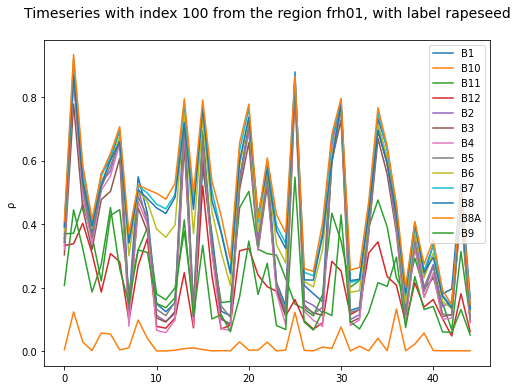

In [19]:
fig1 = train_dataset.show_timeseries(100)

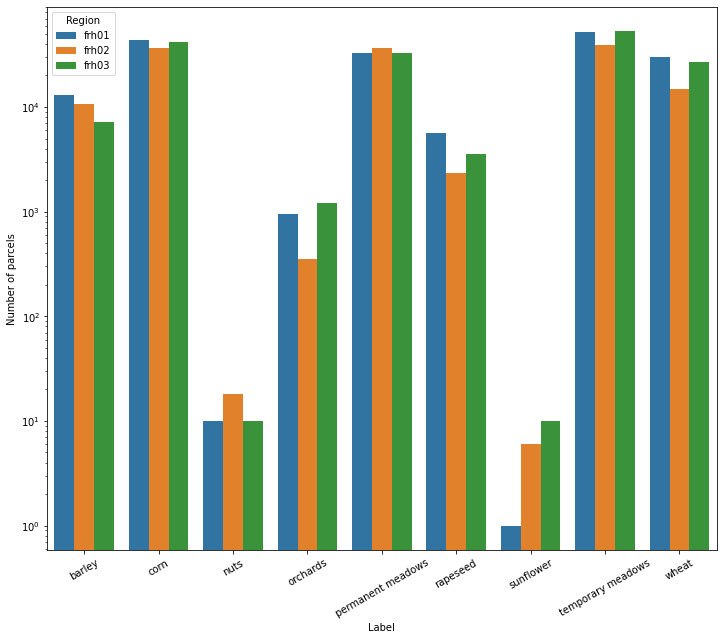

In [20]:
train_dataset.data_distribution_table()
fig2 = train_dataset.data_distribution_barchart()

In [21]:
train_dataset.parcel_distribution_table()

,Region NUTS-3,# L1C
0,frh01,178613
1,frh02,140645
2,frh03,166391
3,Total,485649


## Explore test dataset

In [3]:
test_dataset = BreizhCropsDataset(test_dataset_config)

test_dataset.show_samples()

Path ../data/breizhcrops_dataset/2017/L1C/frh04.h5


,Unnamed: 0,id,CODE_CULTU,path,idx,meanCLD,sequencelength,classid,classname,region
0,0,6017564,PTR,csv/frh04/6017564.csv,0,780.075742,102,8,temporary meadows,frh04
1,6,6054675,PTR,csv/frh04/6054675.csv,6,731.428571,49,8,temporary meadows,frh04
2,7,6018665,PTR,csv/frh04/6018665.csv,7,710.530612,49,8,temporary meadows,frh04
3,8,6019318,PTR,csv/frh04/6019318.csv,8,770.534653,101,8,temporary meadows,frh04
4,9,6019435,RGA,csv/frh04/6019435.csv,9,600.625715,49,8,temporary meadows,frh04
5,10,6019436,BTH,csv/frh04/6019436.csv,10,586.861363,49,1,wheat,frh04
6,11,6057048,PTR,csv/frh04/6057048.csv,11,689.632653,49,8,temporary meadows,frh04
7,14,6017566,BTH,csv/frh04/6017566.csv,14,762.577724,49,1,wheat,frh04
8,18,6022687,BTH,csv/frh04/6022687.csv,18,769.612359,102,1,wheat,frh04
9,19,6022885,MIE,csv/frh04/6022885.csv,19,616.419599,50,3,corn,frh04


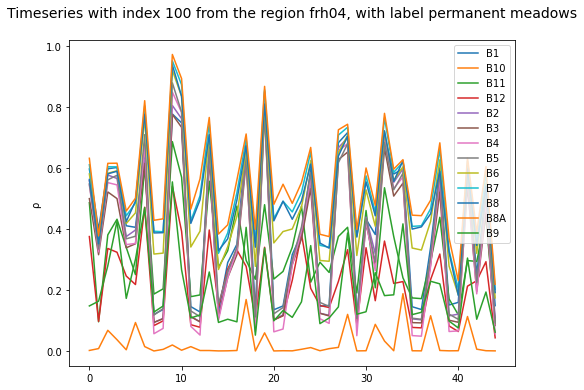

In [16]:
fig1 = test_dataset.show_timeseries(100)

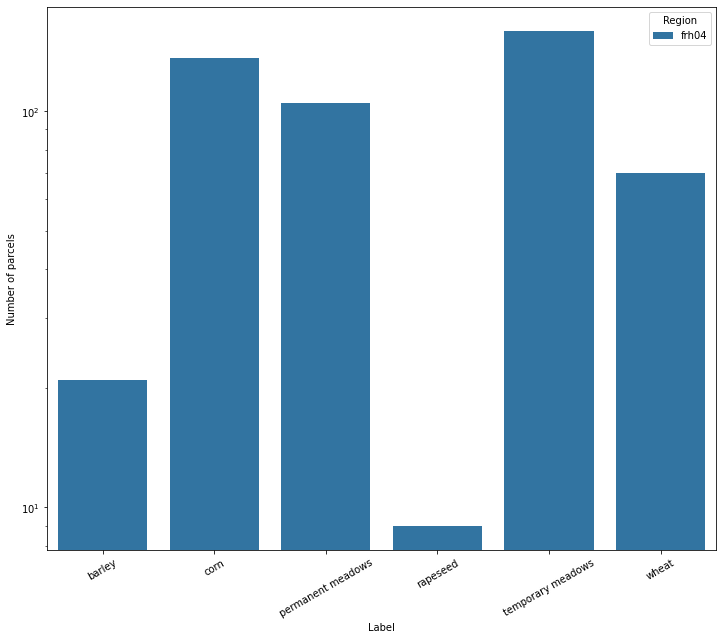

In [41]:
test_dataset.data_distribution_table()
fig2 = test_dataset.data_distribution_barchart()

In [4]:
test_dataset.parcel_distribution_table()

,Region NUTS-3,# L1C
0,frh04,122614
1,Total,122614



# Training the models

The models need to be trained before running this notebook, using breizhcrops_train_and_evaluate files:

python -m aitlas.run configs/breizhcrops/breizhcrops_train_and_evaluate_<modelname>.json


The following models were included in this evaluation:

```
"OmniScaleCNN", "TempCNN","MSResNet", "InceptionTime", "LSTM","StarRNN","TransformerEncoder"

```

In [5]:
import sklearn.metrics

def calc_metrics(y_true, y_pred):
    print(y_true.shape)
    print(y_pred.shape)
    accuracy = sklearn.metrics.accuracy_score(y_true, y_pred)
    kappa = sklearn.metrics.cohen_kappa_score(y_true, y_pred)
    f1_micro = sklearn.metrics.f1_score(y_true, y_pred, average="micro")
    f1_macro = sklearn.metrics.f1_score(y_true, y_pred, average="macro")
    f1_weighted = sklearn.metrics.f1_score(y_true, y_pred, average="weighted")
    recall_micro = sklearn.metrics.recall_score(y_true, y_pred, average="micro")
    recall_macro = sklearn.metrics.recall_score(y_true, y_pred, average="macro")
    recall_weighted = sklearn.metrics.recall_score(y_true, y_pred, average="weighted")
    precision_micro = sklearn.metrics.precision_score(y_true, y_pred, average="micro")
    precision_macro = sklearn.metrics.precision_score(y_true, y_pred, average="macro")
    precision_weighted = sklearn.metrics.precision_score(y_true, y_pred, average="weighted")

    return dict(
        accuracy=accuracy,
        kappa=kappa,
        f1_micro=f1_micro,
        f1_macro=f1_macro,
        f1_weighted=f1_weighted,
        recall_micro=recall_micro,
        recall_macro=recall_macro,
        recall_weighted=recall_weighted,
        precision_micro=precision_micro,
        precision_macro=precision_macro,
        precision_weighted=precision_weighted,
    )

Set parameters for best models

In [6]:

model_configs = {
    "inceptiontime" : {
        "model": {
            "classname": "aitlas.models.InceptionTime",
            "config": {
                "input_dim":13,
                "num_classes": 9,
                "learning_rate": 0.00896,
                "weight_decay" : 0.00000222,
                "num_layers" : 3,
                "hidden_dims" : 128,
                "metrics":["accuracy","f1_score", "kappa"]
            }
        }
    },
    "lstm" : {
        "model": {
            "classname": "aitlas.models.LSTM",
            "config": {
                "input_dim":13,
                "num_classes": 9,
                "learning_rate": 0.00988,
                "weight_decay" : 0.000000526,
                "num_layers" : 4,
                "hidden_dims" : 128,
                "dropout" : 0.5713,
                "metrics":["accuracy","f1_score", "kappa"]
            }
        }
    },
    "msresnet" : {
        "model": {
            "classname": "aitlas.models.MSResNet",
            "config": {
                "input_dim":13,
                "num_classes": 9,
                "learning_rate": 0.000000627,
                "weight_decay" : 0.00000475,
                "hidden_dims" : 32,
                "metrics":["accuracy","f1_score", "kappa"]
            }
        }
    },
    "starrnn" : {
        "model": {
            "classname": "aitlas.models.StarRNN",
            "config": {
                "input_dim":13,
                "num_classes": 9,
                "learning_rate": 0.00896,
                "weight_decay" : 0.00000222,
                "num_layers" : 3,
                "hidden_dims" : 128,
                "metrics":["accuracy","f1_score", "kappa"]
            }
        }
    },
    "oscnn" : { 
        "model": {
            "classname": "aitlas.models.OmniScaleCNN",
            "config": {
                "input_dim":13,
                "num_classes": 9,
                "learning_rate": 0.001066,
                "weight_decay" : 0.000000225,
                "metrics":["accuracy","f1_score", "kappa"]
            }
        }
    },
    "transformer" : {
        "model": {
            "classname": "aitlas.models.TransformerModel",
            "config": {
                "input_dim":13,
                "num_classes": 9,
                "learning_rate": 0.00131,
                "d_model" : 64,
                "dropout" : 0.4,
                "metrics":["accuracy","f1_score", "kappa"]
            }
        }
    },
    "tempcnn" : {
        "model": {
            "classname": "aitlas.models.TempCNN",
            "config": {
                "input_dim":13,
                "num_classes": 9,
                "sequence_length": 45,
                "learning_rate": 0.000238,
                "weight_decay" : 0.0000518,
                "kernel_size" : 7,
                "hidden_dims" : 128,
                "dropout" : 0.18,
                "metrics":["accuracy","f1_score", "kappa"]
            }
        }
    }
}



Experiment Folder structure
```
examples/
    experiment/
        breizhcrops/
            <model>/
                checkpoint_<ts>_.pth.tar
            ...
```

In [7]:

def load(run):
    print(run)
    # 
    # implement the prediction here

    dataset = BreizhCropsDataset(test_dataset_config)
    models = [l for l in os.listdir(os.path.join(logdir,run)) if l.startswith("checkpoint")]
    print(models)
    last_model = models[0]
    for model in models:
        timestamp = int(model.split('.')[0].split("_")[1])
        print(timestamp)
        print(int(last_model.split('.')[0].split("_")[1]))
        if timestamp > int(last_model.split('.')[0].split("_")[1]):
            last_model=model
    model_path = os.path.join(logdir,run,last_model)
    model_cls = get_class(model_configs[run]['model']['classname'])
    model = model_cls(model_configs[run]['model']['config'])
    model.prepare()
    model.load_model(model_path)
    y_true, y_pred, _ = model.predict(dataset)
    rs = pd.DataFrame([np.array(y_pred).flatten(), np.array(y_true).flatten()],index=["y_pred","y_true"]).T#.set_index("field_ids")

    return rs

def load_table(logdir):
    runs = [ run for run in os.listdir(logdir) if  os.path.isdir(logdir)]
    print(runs)
    #runs = ["LSTM","OmniScaleCNN","MSResNet","StarRNN","TempCNN","TransformerEncoder", "InceptionTime"]

    stats = list()
    for run in ['lstm']:
        rs = load(run)
        stat = calc_metrics(rs.y_true.values,rs.y_pred.values)
        stat["model"] = run
        stats.append(stat)
    stats = pd.DataFrame(stats).set_index("model")

    df = stats.T
    #df["RF"] = ""

    #models = ["RF","OmniScaleCNN", "TempCNN","MSResNet", "InceptionTime", "LSTM","StarRNN","TransformerEncoder"]
    table = df.loc[["accuracy","recall_macro","f1_macro","f1_weighted","kappa"]]
    table.index = ["overall accuracy","average accuracy","class-mean f-score","weighted f-score","kappa-metric"]
    return table

### Compile L1C Results

In [8]:
logdir = "experiment/breizhcrops"

l1tables = []
table = load_table(logdir).T
table["fold"] = 1
l1tables.append(table)


['lstm']
lstm
Path ../data/breizhcrops_dataset/2017/L1C/frh04.h5
2021-06-02 14:42:19,190 INFO Loading checkpoint experiment/breizhcrops/lstm/checkpoint_1621989537.pth.tar
2021-06-02 14:42:19,211 INFO Loaded checkpoint experiment/breizhcrops/lstm/checkpoint_1621989537.pth.tar at epoch 18
running prediction:   0%|          | 0/120 [00:00<?, ?it/s]['checkpoint_1621957388.pth.tar', 'checkpoint_1621988580.pth.tar', 'checkpoint_1621970753.pth.tar', 'checkpoint_1621989537.pth.tar', 'checkpoint_1621979662.pth.tar', 'checkpoint_1621961842.pth.tar', 'checkpoint_1621966299.pth.tar', 'checkpoint_1621984124.pth.tar', 'checkpoint_1621952930.pth.tar', 'checkpoint_1621975215.pth.tar']
1621957388
1621957388
1621988580
1621957388
1621970753
1621988580
1621989537
1621988580
1621979662
1621989537
1621961842
1621989537
1621966299
1621989537
1621984124
1621989537
1621952930
1621989537
1621975215
1621989537
running prediction: 100%|██████████| 120/120 [16:05<00:00,  8.04s/it]
[8 8 8 ... 3 3 3]
[7 8 8 ... 3 3

In [15]:
meantable = pd.concat(l1tables).groupby(["model"]).mean()
stdtable = pd.concat(l1tables).groupby(["model"]).std()

metrics = ["overall accuracy","average accuracy","class-mean f-score","weighted f-score","kappa-metric"]
models = ["OmniScaleCNN","TempCNN","MSResNet", "InceptionTime", "LSTM", "StarRNN", "TransformerEncoder"]
for metric in metrics:
    entries = list()
        
    for model in ["lstm"]: #models
        entries.append("$" + f"{meantable.loc[model,metric]:.2f}"+"^{\\pm "+ f"{stdtable.loc[model,metric]:.2f}" + "}$")
    row = f"{metric} & & " + " & ".join(entries)
    row += " \\\ "
    print(row)

overall accuracy & & $0.81^{\pm nan}$ \\ 
average accuracy & & $0.58^{\pm nan}$ \\ 
class-mean f-score & & $0.58^{\pm nan}$ \\ 
weighted f-score & & $0.80^{\pm nan}$ \\ 
kappa-metric & & $0.75^{\pm nan}$ \\ 


In [16]:
pd.concat(l1tables).groupby(["model","fold"]).first()

,,overall accuracy,average accuracy,class-mean f-score,weighted f-score,kappa-metric
model,fold,,,,,
lstm,1,0.806409,0.578943,0.58112,0.802644,0.747789
